In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [55]:
train_df = pd.read_csv('Training_knight.csv')
val_df = pd.read_csv('Validation_knight.csv')
test_df = pd.read_csv('../Test_knight.csv')

In [56]:
X_train = train_df.drop(columns=['knight'])
y_train = train_df['knight']

X_val = val_df.drop(columns=['knight'])
y_val = val_df['knight']

X_test = test_df

In [57]:
def evaluate_knn(k_values, X_train, y_train, X_val, y_val):
    f1_scores = []
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        
        y_val_pred = knn.predict(X_val)
        
        f1 = f1_score(y_val, y_val_pred, pos_label='Jedi')
        f1_scores.append(f1)
        
    return f1_scores

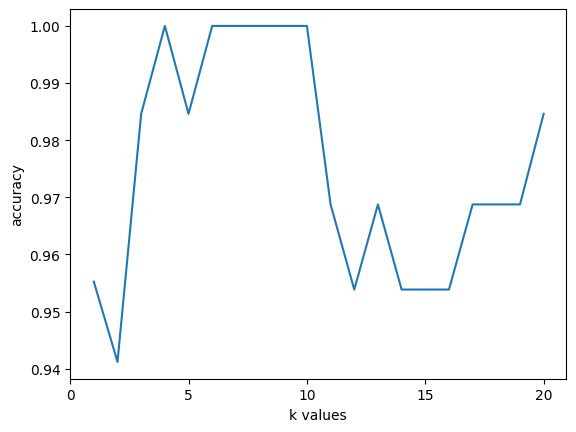

In [59]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

f1_scores = evaluate_knn(range(1, 21), X_train_scaled, y_train, X_val_scaled, y_val)

plt.plot(k_values, f1_scores)
plt.xticks([i for i in range(0, 21, 5)])
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.show()

In [60]:
best_k = k_values[np.argmax(f1_scores)]
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

y_test_pred = final_knn.predict(X_test_scaled)

with open('KNN.txt', 'w') as f:
    for pred in y_test_pred:
        f.write(f"{pred}\n")